# ARIM-Academy：　基礎編　Scikit-learn（予測）

## 本編の目標

本演習では、ボストン市の住宅価格を予測するための代表的なデータセットであるBoston Housingデータセットを利用し、機械学習の基礎を習得します。このデータセットには、住宅価格の中央値（MEDV）をはじめ、犯罪率、部屋数、地域ごとの特性など、多岐にわたる特徴量が含まれています。

1. **データ前処理**  
実世界のデータであるため、欠損値や異常値が含まれている可能性があります。また、特徴量のスケールが異なる場合、モデルの学習に悪影響を与えることがあります。そこで、本演習では、欠損値の補完、異常値の検出・除去、標準化や正規化といったデータ前処理の手法を学びます。これにより、モデルの精度向上に繋がるデータの整形を行います。

2. **さまざまな回帰モデルの構築と比較**  
線形回帰、ランダムフォレストなど、代表的な回帰モデルを構築し、それぞれのモデルの予測性能を比較します。各モデルの特性を理解し、どのモデルがボストン市の住宅価格を最も正確に予測できるかを実験的に検証します。

3. **モデル評価**  
構築したモデルの性能を評価するために、平均二乗誤差（MSE）や決定係数（R2スコア）などの評価指標を用います。これらの指標に基づいて、モデルの精度を定量的に評価し、より良いモデルへと改善するための指針を得ます。

4. **特徴量の重要度分析**  
モデルの学習過程で、各特徴量が予測にどの程度貢献しているのかを分析します。これにより、住宅価格に最も影響を与える要因を特定し、モデルの解釈性を高めることができます。また、特徴量選択の際に役立つ情報を得ることも可能です。

---

## データセット

<div style="border:1px solid #000; padding:10px;">

Boston Housingデータセットは、1970年代初頭にアメリカのマサチューセッツ州ボストン市で収集された住宅価格に関する情報を含むデータセットです。このデータセットは、機械学習や統計分析の研究で広く使用されてきました。Boston Housingデータセットには、506の異なる地域（郊外）の住宅に関する情報が含まれています。各地域には、住宅価格を予測するための13種類の特徴があります。

- **CRIM**: 町別の「犯罪率」
- **ZN**: 25,000平方フィートを超える区画に分類される住宅地の割合（広い家の割合）
- **INDUS**: 町別の「非小売業の割合」
- **CHAS**: チャールズ川のダミー変数（区画が川に接している場合は1、そうでない場合は0）（川の隣か）
- **NOX**: NOx濃度（0.1ppm単位）（一酸化窒素濃度、parts per 10 million単位）。この項目を目的変数とする場合もある
- **RM**: 1戸当たりの「平均部屋数」
- **AGE**: 1940年より前に建てられた持ち家の割合（古い家の割合）
- **DIS**: 5つあるボストン雇用センターまでの加重距離（主要施設への距離）
- **RAD**: 「主要高速道路へのアクセス性」の指数
- **TAX**: 10,000ドル当たりの「固定資産税率」
- **PTRATIO**: 町別の「生徒と先生の比率」
- **BLACK**: 「1000(Bk - 0.63)」の二乗値。Bk＝「町ごとの黒人の割合」を指す
- **LSTAT**: 「低所得者人口の割合」
- **MEDV**: 「住宅価格」（1000ドル単位）の中央値。通常はこの数値が目的変数として使われる

</div>

---

<font color="red"><h3>【利用にあたっての注意】</h3></font>  
<font color="red">Boston Housingデータセットは、住宅価格の予測や地域の特徴の関係性の分析など、さまざまな機械学習のタスクに使用されてきました。しかし、「黒人の割合」などの差別的なデータを含んでいるため，Scikit learnのversion 1.0以降から利用は非推奨となりました。</font>  

<font color="red">このようにオープンソースのデータセットであっても、時代とともに時代にそぐなくなるデータもあることを念頭におきながら、データ解析をする必要もあります。</font>


### 教材への接続
google colabにおけるオンラインの場合にこのラインを実行します。（<font color="red">Google colabに接続しない場合には不要</font>）

In [ ]:
!git clone https://github.com/ARIM-Academy/Advanced_Tutorial_1.git
%cd Advanced_Tutorial_1

# 1.データセットの読み込みと前処理

### ライブラリのインポート
カリキュラムで扱うpythonのライブラリをimport文でロードします。 機械学習のライブラリであるscikit-learnは後半でimportします。

In [1]:
#ライブラリ
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### サンプルファイルの読み込み
pandasライブラリのread_csv()関数は、CSVファイルを読み込んでpandasのDataFrame形式に変換する関数です。ここでは、[data]フォルダ内に保存されているBoston.csvファイルをDataFrameとして読み込み、その結果をdfという変数に格納します。

In [3]:
#データセットの読み込み
df = pd.read_csv('data/Boston.csv', index_col=0)

In [4]:
#データセットの確認
df

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
1    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
2    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
3    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
4    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
5    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  medv  
1       15.3  396.90   4.98  24.0  
2       17.8  396.90   9.14  21.6  
3       17.8  392.83   4.03  34.7  
4       18.7  394.63   2.94  33.4  
5       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
502     21.0  391.99   9.67  22.4  
503     21.0  396.90   9.08  20.6  
504     21.0  396.90   5.64  23.9  
505     21.0  393.45   6.48  22.0  
506     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

### 不必要・不適切な特徴量の削除
pandasライブラリではデータフレームから特定の行や列を削除する操作で`drop()`メソッドを使います。ここではデータフレームdfからblackという名前の列を削除ます。

In [9]:
#　記述子（特徴量）の選定および削除
df = df.drop(['black'],axis = 1)
df

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
1    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
2    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
3    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
4    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
5    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio  lstat  medv  
1       15.3   4.98  24.0  
2       17.8   9.14  21.6  
3       17.8   4.03  34.7  
4       18.7   2.94  33.4  
5       18.7   5.33  36.2  
..       ...    ...   ...  
502     21.0   9.67  22.4  
503     21.0   9.08  20.6  
504     21.0   5.64  23.9  
505     21.0   6.48  22.0  
506     21.0   7.88  11.9  

[506 rows x 13 columns]

# 2. データの探索的分析 (EDA)

探索的データ分析 (EDA) は、データに潜むパターンや特徴、関係性を視覚的に捉え、データに対する深い理解を得るための最初のステップです。EDAを通じて、データの品質を確認し、モデル構築に向けた準備を進めます。

### EDAの目的

EDAの主な目的は以下の通りです。

* **データの理解:** データセットの構造、変数の意味、データの分布などを把握します。
* **データの可視化:** グラフや図を用いて、データの分布、パターン、異常値などを視覚的に表現します。
* **変数間の関係性の探索:** 相関分析やクロス集計などを行い、変数間の関係性を明らかにします。
* **データの前処理への示唆:** 欠損値の処理、外れ値の検出、特徴量エンジニで実施するデータ前処理への示唆を得ます。


### EDAの重要性
EDAは、データ分析の成功を左右する重要なステップです。EDAを通じて得られた知見は、以下の点に役立ちます。
* **適切なモデル選択:** データの特性に基づいて、最適な機械学習モデルを選択できます。
* **特徴量エンジニアリング:** 新しい特徴量を作成したり、既存の特徴量を加工したりすることで、モデルの性能を向上させることができます。
* **データの品質向上:** 欠損値や外れ値を検出し、適切な処理を行うことで、モデルの精度を向前処理への示唆を得ます。

### EDAの手法

EDAの手法は多岐にわたりますが、代表的な手法として以下が挙げられます。

#### 2.1 概要統計量の算出
* **目的:** データの全体的な傾向を把握します。
* **手法:** 平均値、中央値、標準偏差、最小値、最大値などを計算します。
* **ツール:** pandasの`describe()`関数など

#### 2.2 ペアプロットと相関係数の計算
* **目的:** 数値型変数間の関係性を可視化し、相関関係を定量的に評価します。
* **手法:** 散布図行列を作成し、各変数間の相関係数を計算します。
* **ツール:** seabornの`pairplot()`関数、pandasの`corr()`関数など

#### 2.3 データの可視化
* **目的:** データの分布、パターン、異常値などを視覚的に捉えます。
* **手法:** ヒストグラム、箱ひげ図、散布図、バイオリンプロットなど
* **ツール:** matplotlib、seabornなど


3つのぞれぞれのデータ分析についてみてみましょう

### ①概要統計
概要統計（Descriptive Statistics）は、データセットの要約統計量を計算することで、データの特徴や分布を理解する手法です。出力される指標は、平均、中央値、最小値、最大値、標準偏差、四分位数です。

pandasライブラリに含まれている`describe()`メソッドを使うとデータセットの概要統計を簡単に取得することができます。
具体的には、`describe()`関数は以下の統計情報を計算します：

1. **カウント（Count）:** データの非欠損値の数を示します。
2. **平均（Mean）:** データの平均値を示します。
3. **標準偏差（Standard Deviation）:** データのばらつきの尺度を示します。
4. **最小値（Minimum）:** データの最小値を示します。
5. **第一四分位数（25th Percentile）:** データの下位25%の値を示します。
6. **中央値（Median）:** データの中央値（50thパーセンタイル）を示します。
7. **第三四分位数（75th Percentile）:** データの上位25%の値を示します。
8. **最大値（Maximum）:** データの最大値を示します。

In [13]:
#概要統計
df.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.105710    8.707259  168.537116    2.164946    7.141062   
min      2.900000    1.129600    1.000000  187.000000   12.600000    1.730000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000    6.950000   
50%     77.500000    3.207450    5.000000  330.000000   19.050000   11.360000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000   16.955000   
max    100.000000   12.126500   24.000000  711.000000   22.000000   37.970000   

             medv  
count  506.000000  
mean    22.532806  
std      9.197104  
min      5.000000  
25%     17.025000  
50%     21.200000  
75%     25.000000  
max     50.000000

### ②　ペアプロット（散布図行列）
ペアプロット（Pair plot）は、データセット内の複数の数値変数の組み合わせに基づいた散布図行列を可視化する手法です。これにより、変数間の相関やパターンを把握することができます。

ペアプロットを作成するライブラリは幾つかありますが、Seabornライブラリの`pairplot()`メソッドは比較的に簡単にデータセット内の数値変数の組み合わせに基づいて散布図行列を作成し、各変数間の散布図やヒストグラムを表示します。

`pairplot()`メソッドには、さまざまなオプションを持ちます。たとえば、`hue`パラメータを使用すると、カテゴリ変数に基づいて散布図の色分けが行えます。また、`diag_kind`パラメータを使用すると、対角線上に表示されるヒストグラムやカーネル密度推定プロットの種類を指定することもできます。

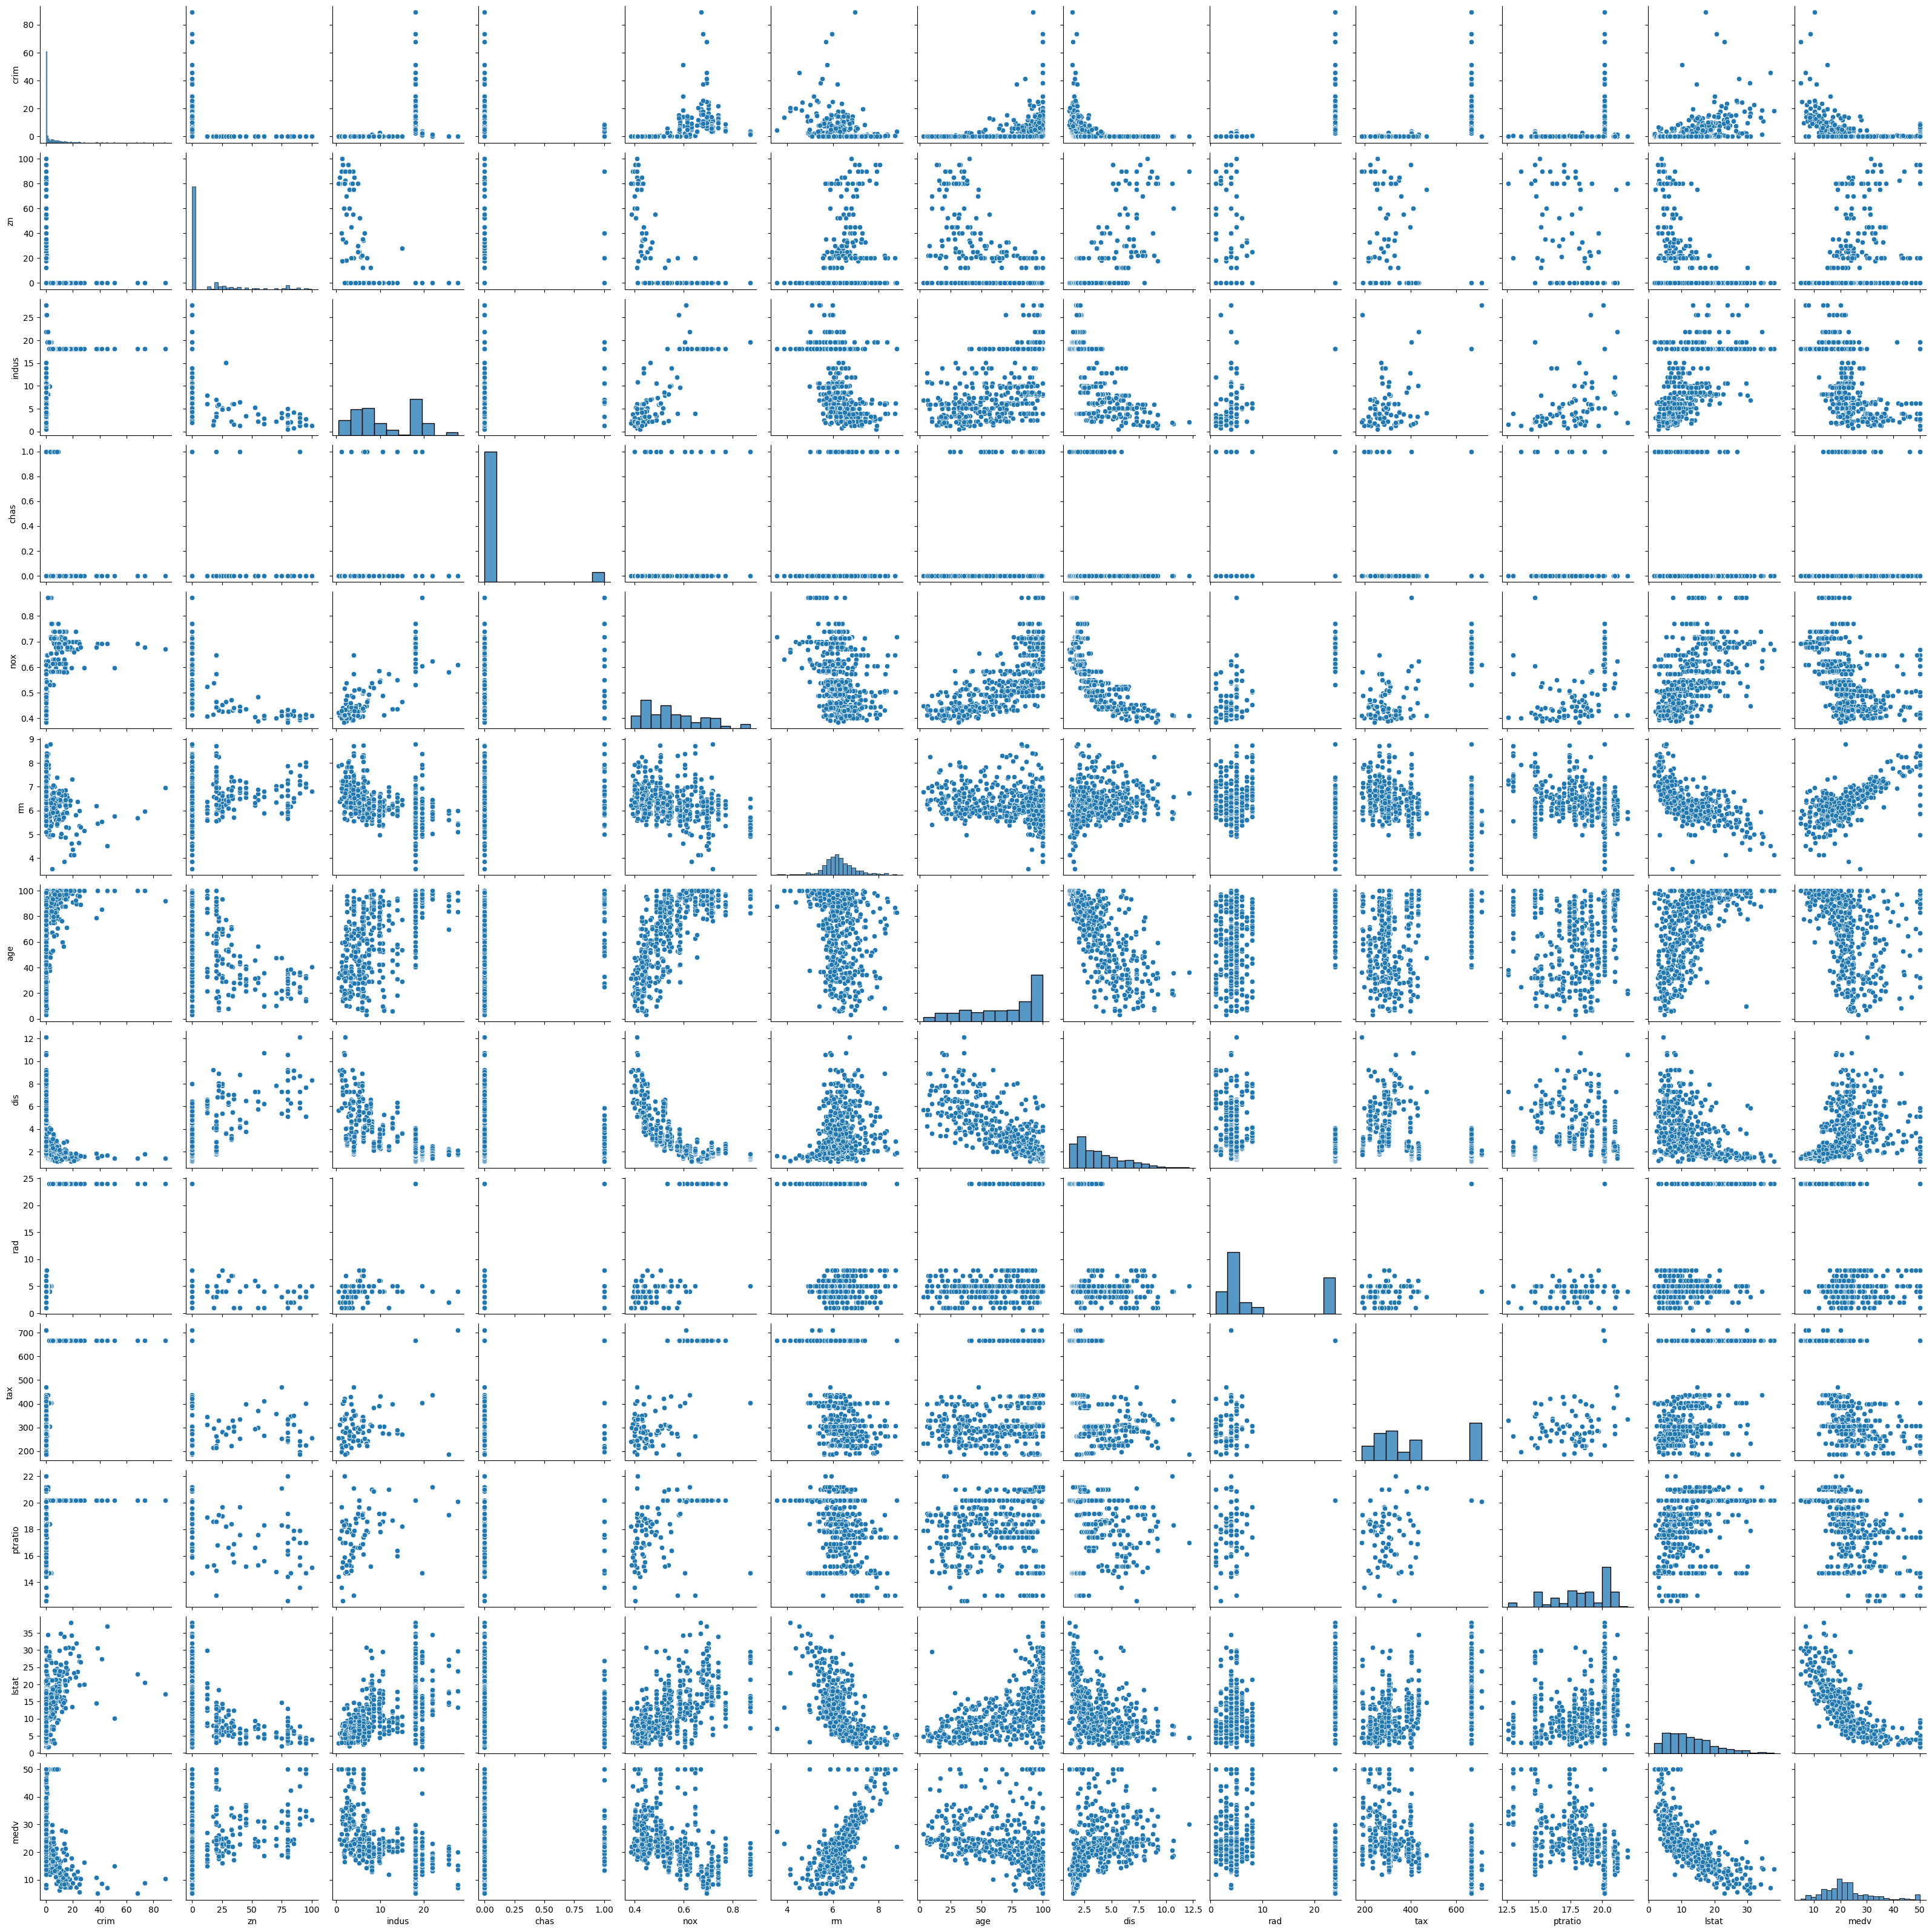

In [16]:
#　ペアプロットによる各変数間の二次元空間像
sns.pairplot(df)
plt.show()

表示させる変数名を絞り込んでみましょう。`pairplot()`のメソッドでは次のようにデータフレームの変数名を指定することで対応できます。

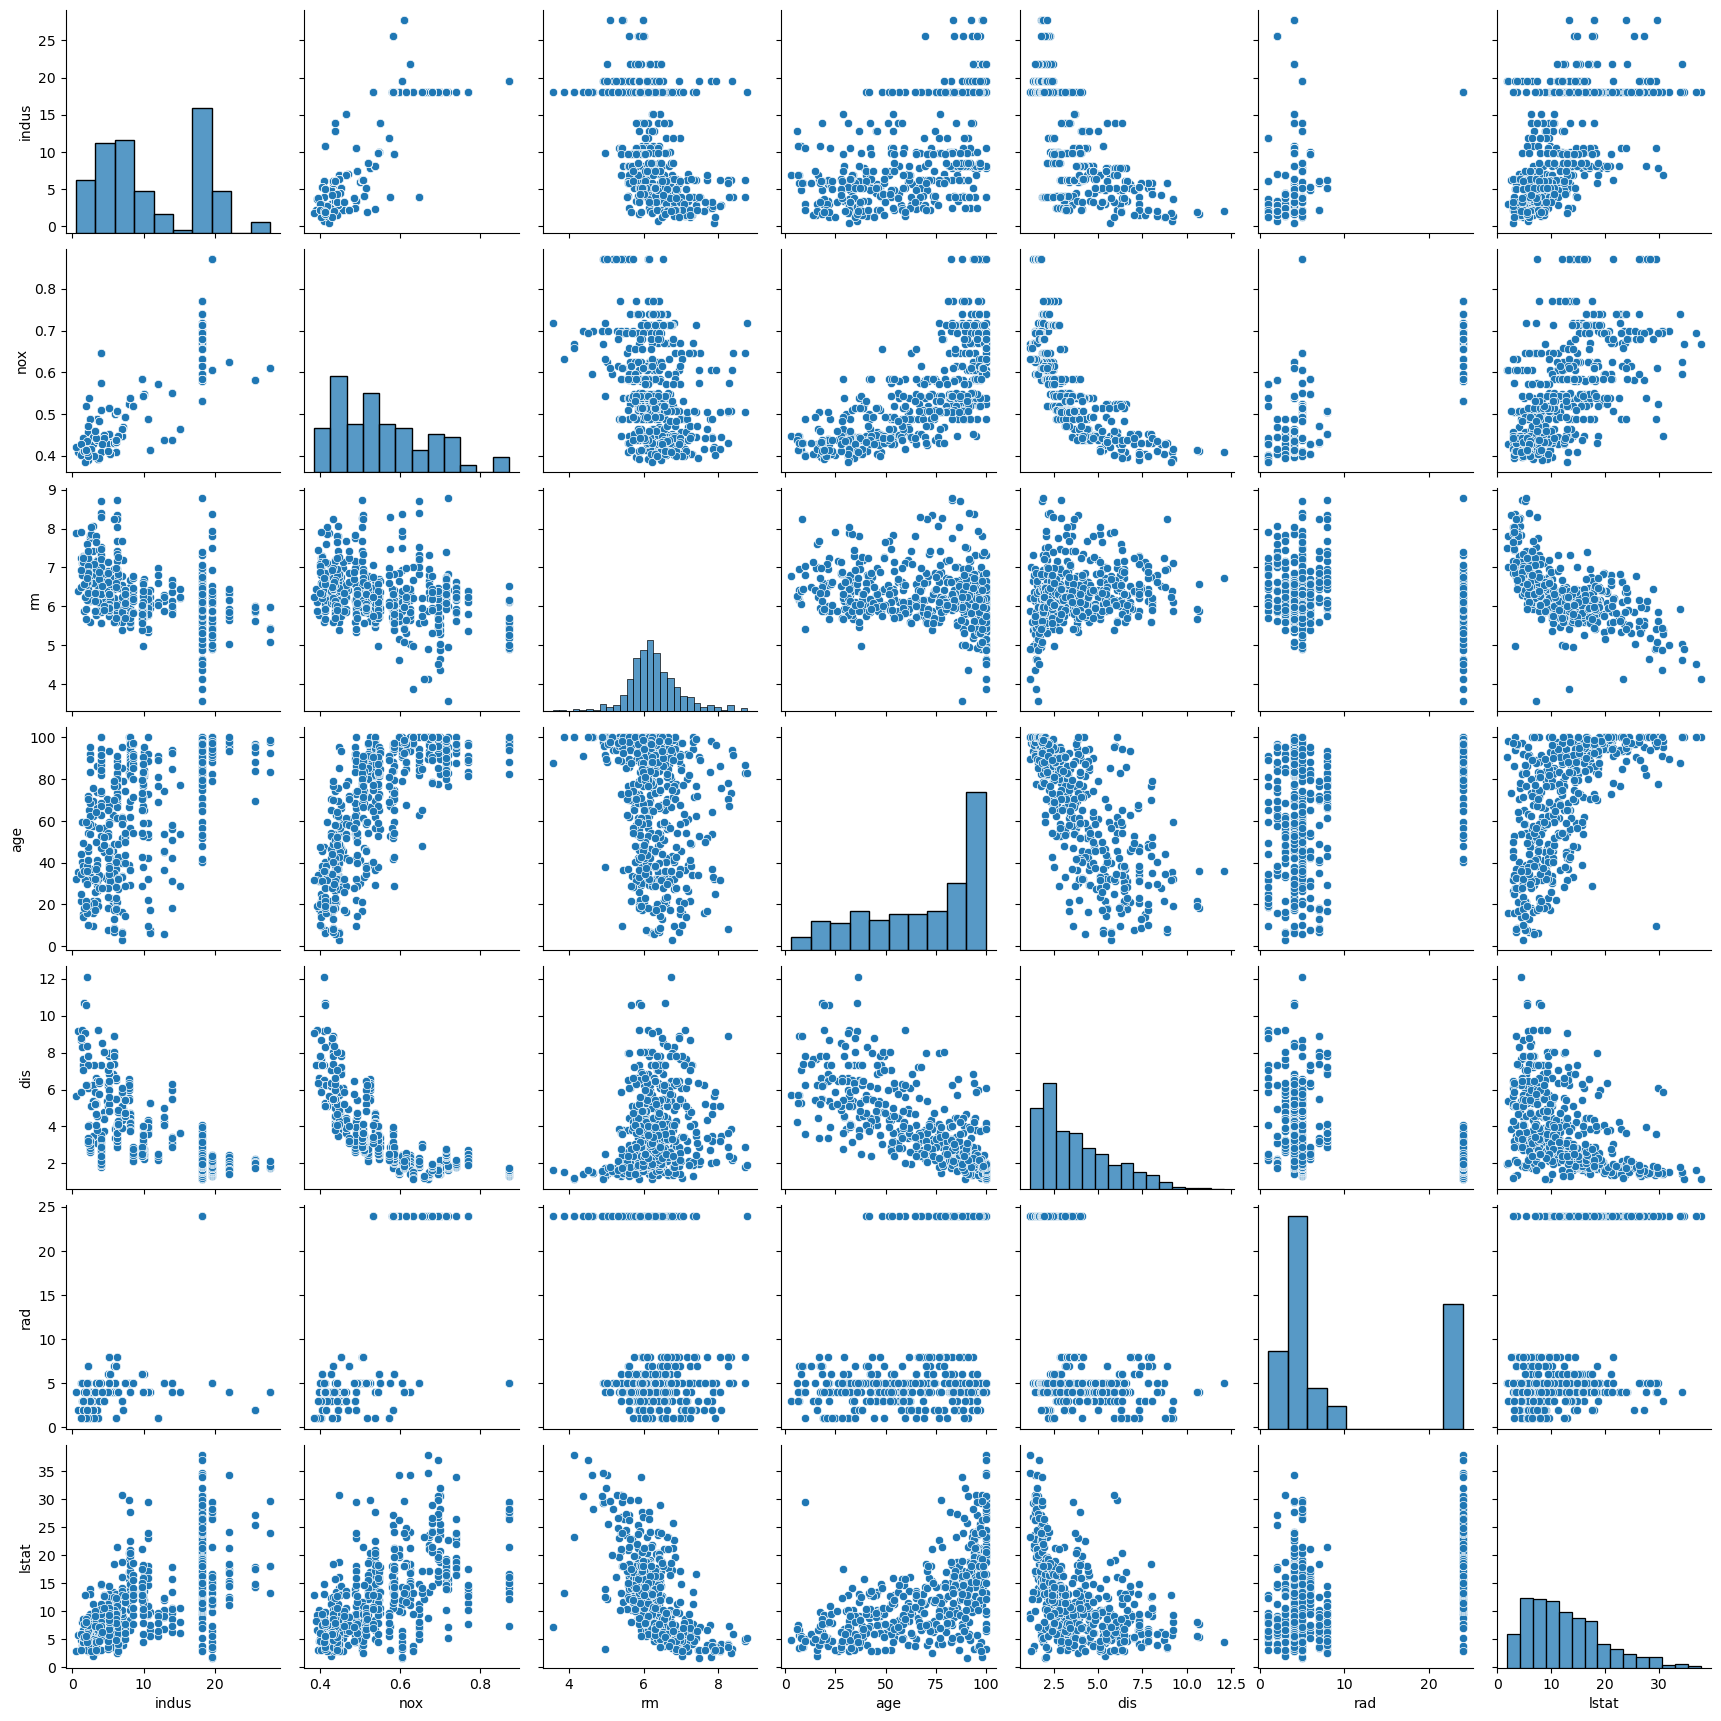

In [18]:
#　ペアプロットによる各変数間の二次元空間像（その２）
TARGET=['indus','nox','rm','age','dis','rad','lstat']
sns.pairplot(df[TARGET])
plt.show()

### ③ピアソン相関係数

ピアソンの相関係数は、2つの変数の間の線形関係の強さと方向を示す統計的指標です。値は-1から1の範囲を取り、以下のように解釈されます：

1：完全な正の相関（変数が同じ方向に変動）  
0：相関なし（変数間に線形関係がない）  
-1：完全な負の相関（変数が逆の方向に変動）  

相関係数の絶対値が大きいほど、2つの変数間の線形関係が強いことを示します。

pandasの`corr()`メソッドを使用すると数値データを持つ全ての列間の相関係数を計算し、相関行列として出力します。

In [20]:
#　相関係数
corr = df.corr()
corr

crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
lstat    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
medv    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              dis       rad       tax   ptratio     lstat      medv  
crim    -0.379670  0.625505  0.582764  0.289946  0.455621 -0.388305  
zn       0.664408 -0.311948 -0.314563 -0.391679 -0.412995  0.360445  
indus   -0.708027  0.595129  0.720760  0.383248  0.603800 -0.483725  
chas    -0.099176 -0.007368 -0.035587 -0.121515 -0.053929  0.175260  
nox     -0.769230  0.611441  0.668023  0.188933  0.590879 -0.427321  
rm       0.205246 -0.209847 -0.292048 -0.355501 -0.613808  0.695360  
age     -0.747881  0.456022  0.506456  0.261515  0.602339 -0.376955  
dis      1.000000 -0.494588 -0.534432 -0.232471 -0.496996  0.249929  
rad     -0.494588  1.000000  0.910228  0.464741  0.488676 -0.381626  
tax     -0.534432  0.910228  1.000000  0.460853  0.543993 -0.468536  
ptratio -0.232471  0.464741  0.460853  1.000000  0.374044 -0.507787  
lstat   -0.496996  0.488676  0.543993  0.374044  1.000000 -0.737663  
medv     0.249929 -0.381626 -0.468536 -0.507787 -0.737663  1.000000

### ④相関係数のヒートマップ
相関係数の数値だけでは、変数間の関係を直感的に捉えづらいことがあります。そこで、ヒートマップを用いて相関係数行列を可視化することで、変数間の関係性を視覚的に把握します。seabornライブラリのheatmap()関数は、DataFrame内の数値データの相関係数を色で表現したヒートマップを簡単に作成できます。さらに、annot=Trueオプションを指定することで、各セルに相関係数の数値を表示し、より詳細な情報を得ることができます。

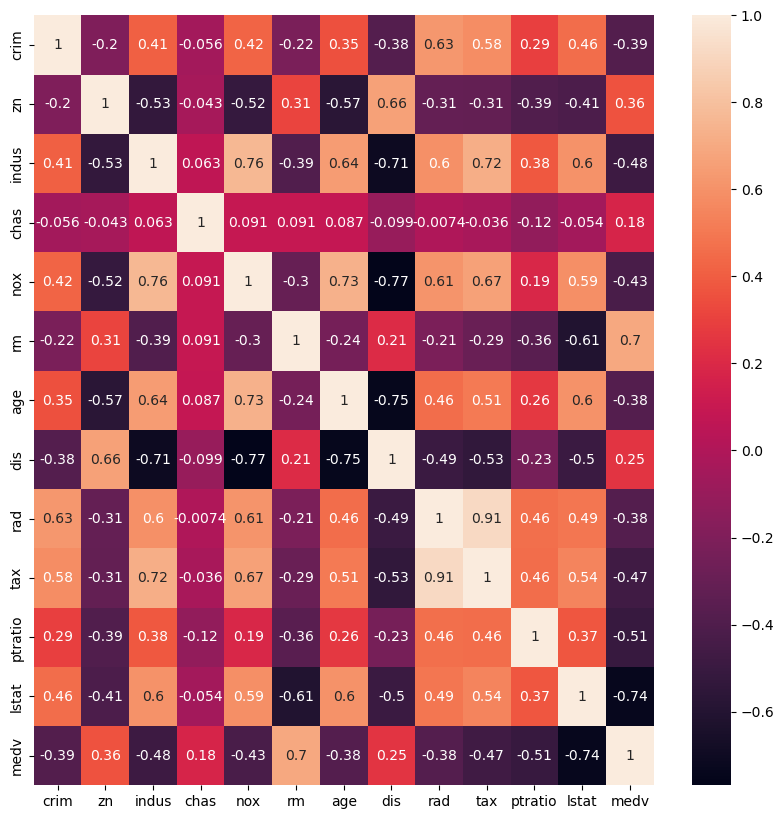

In [22]:
#相関係数をヒートマップ化する

plt.figure(figsize=(10,10))

sns.heatmap(corr, annot=True)
plt.show()

# 3.着目する特徴量のグラフ化
ペアプロットでは対象とするすべての相関グラフとヒストグラムを出力しました。ここでは、特に着目する特徴量のグラフについてmatpltlibを使って描画する流れを学びます。

### 頻度分析（ヒストグラム）
Boston Housingデータセットにおける住宅価格の分布を視覚化するヒストグラムを表示し、価格帯ごとの頻度をみてみましょう。

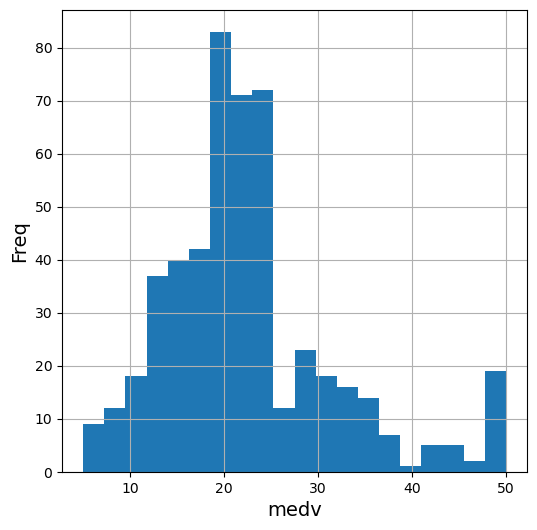

In [25]:
# 住宅価格のヒストグラム
fig, ax = plt.subplots(figsize=(6,6))

#着目する変数の指定（ここでは住宅価格）
X = df['medv']

#ビン数は20分割
ax.hist(X, bins = 20)

#ラベル名
plt.xlabel(df.columns[12], fontsize =14)
plt.ylabel('Freq', fontsize =14)

plt.grid()
plt.show()

### 相関図
Boston Housingデータセットを使って、住宅価格 (medv) と部屋数 (rm) との関係を示す散布図を作成してみましょう。

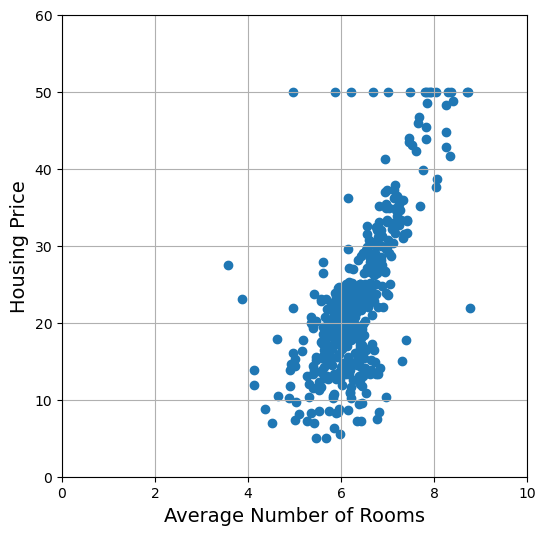

In [28]:
#住宅価格と部屋数との相関図
fig, ax = plt.subplots(figsize=(6,6))

#着目する変数の指定（ここでは住宅価格と部屋数）
X = df[['rm']]
y = df[['medv']]

ax.scatter(X,y)

plt.xlabel("Average Number of Rooms", fontsize =14)
plt.ylabel("Housing Price", fontsize =14)

# 横軸のレンジを0から10に設定
plt.xlim(0, 10)
plt.ylim(0, 60)

plt.grid()
plt.show()

### 特定の数値のフィルタリング
Boston Housingデータセットでは、住宅価格（MEDV）の上限が50に設定されており、実際の価格が50を超える住宅はすべて50と記録されています。このため、**データの分布が歪んでいる可能性**があります。特に高価格帯の住宅を分析する際には、この上限値の影響を考慮する必要があります。そこで、ここでは50を超える価格のデータを除外し、分析を進めることにします。

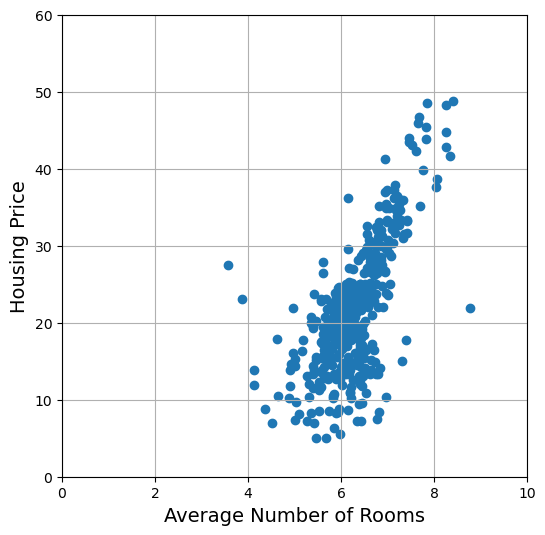

In [30]:
#住宅価格と部屋数との相関図

# 50を超える価格のデータを除外
filtered_df = df[df['medv'] < 50]

# フィルタリングされたデータの取得
X = filtered_df[['rm']]
y = filtered_df[['medv']]

fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(X,y)

plt.xlabel("Average Number of Rooms", fontsize =14)
plt.ylabel("Housing Price", fontsize =14)

# 横軸のレンジを0から10に設定
plt.xlim(0, 10)
plt.ylim(0, 60)

plt.grid()
plt.show()

### 単回帰モデル
線形回帰モデルは、複数の入力変数（特徴量）と一つの出力変数（目的変数）の間の関係を、直線または平面（多次元の場合）で表すモデルです。つまり、入力変数の値が変化すると、出力変数の値が線形に変化するという仮定に基づいています。この中で、最も単純なモデルが「単回帰」です。単回帰は、一つの入力変数と一つの出力変数の間の関係を直線で表すモデルです。

本節では、Pythonの機械学習ライブラリであるscikit-learnを用いて、単回帰分析を行う方法を解説します。

#### ①Scikit-learnライブラリのインポート
Scikit-learnライブラリのlinear_modelモジュールから線形回帰モデルのためのクラスである`LinearRegression`クラスをインポートします。

In [33]:
# 線形回帰モデル
from sklearn.linear_model import LinearRegression

#### ②変数の指定
LinearRegressionモデルには2次元の配列（特徴量）を渡す必要があります。Xとyを次のようにして2次元のデータとしてリスト化します。

In [35]:
# フィルタリングされたデータの取得
X = filtered_df[['rm']]
y = filtered_df[['medv']]

#### ③機械学習モデル作成

[1] **機械学習モデルの設定（インスタンス化）**：  
単回帰を含む機械学習モデルをScikit-learnで行う場合、まず機械学習モデルのクラスをインスタンス化します。ここでは線形回帰モデルを適用するので、線形回帰モデルのクラスである`LinearRegression()`をmodel（インスタンス変数）として指定して、インスタンスを作成します。

[2] **モデルの訓練（Fitting）**：  
続いてインスタンスに`fit()'メソッドを作用させて、与えられたデータに基づいて、入力変数と出力変数の関係を最もよく説明する線形関数の係数を計算し、フィッティングします。これは機械学習では訓練（Training）と称されます。

以下のように2行で実質的な機械学習モデルの構築とトレーニングが完了します

In [45]:
#予測器の作成
model = LinearRegression()

#モデルの訓練（フィッティング）
model.fit(X, y)

LinearRegression()

#### ④出力変数の予測値の計算
訓練済みの線形回帰モデルを使用して、入力データXに基づいて予測値を計算する方法は、`predict()`メソッドを使います。以下の例では`model.predict(X)`の結果は、入力データに対する予測された出力変数（目的変数）の値であり、`y_pred`という変数に格納されます。

In [48]:
y_pred = model.predict(X)

#### ⑤予測値の可視化
データに対して④で予測された値（予測値）を布置し、実際の価格と予測された価格をプロットします。

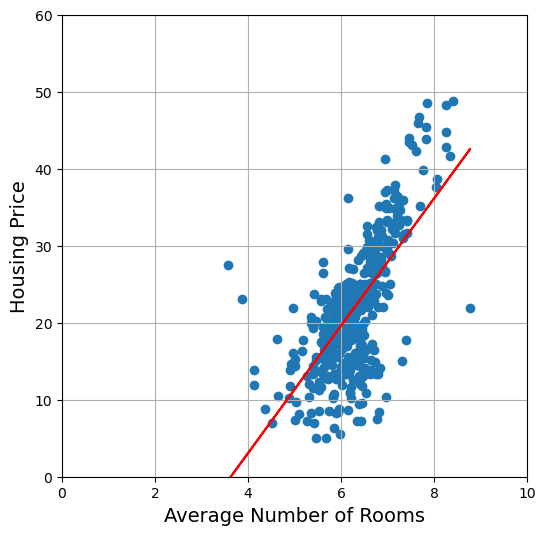

In [51]:
#住宅価格と部屋数との関係図
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(X, y)
ax.plot(X, y_pred, linestyle="solid", color = "red")

plt.xlabel("Average Number of Rooms", fontsize =14)
plt.ylabel("Housing Price", fontsize =14)

# 横軸のレンジを0から10に設定
plt.xlim(0, 10)
plt.ylim(0, 60)

plt.grid()
plt.show()

#### ⑥モデルの評価
モデルの性能を評価するために、いくつかの指標を用います。代表的な指標として、平均二乗誤差（MSE）、平均絶対誤差（MAE）、決定係数（R²スコア）などが挙げられます。

今回は、決定係数と相関係数に注目してモデルを評価します。決定係数は、モデルが実際のデータの変動をどれくらい説明できているかを示す指標です。一方、相関係数は、予測値と実際の値の間の線形な関係の強さを表します。

決定係数は、一般的に0から1の値をとり、1に近いほどモデルの当てはまりが良いことを示します。また、相関係数は-1から1の値をとり、1に近ければ強い正の相関、-1に近ければ強い負の相関、0に近ければ相関がないことを示します。

In [54]:
print('①　係数：', model.coef_[0])
print('②　切片：',model.intercept_)
print('③　決定係数 R^2： {:.3f}'.format(model.score(X, y)))

# 相関係数を決定係数から計算
r_squared = model.score(X, y)
correlation_coefficient = np.sqrt(r_squared)
print('④　相関係数： {:.3f}'.format(correlation_coefficient))

①　係数： [8.26855732]
②　切片： [-30.00512015]
③　決定係数 R^2： 0.471
④　相関係数： 0.687


【解説】  
① **係数**： `model.coef_` は線形回帰モデルの係数（回帰係数）を表します。この場合、`model.coef_[0]` は、最初の特徴量の係数を表示します。もし複数の特徴量がある場合は、`model.coef_` は配列で、各要素が対応する特徴量の係数になります。

② **切片**： `model.intercept_` は線形回帰モデルの切片（回帰直線がY軸と交わる点の値）を表示します。これは、すべての特徴量がゼロの場合の予測値です。

③ **決定係数**： `model.score(X, y)` はモデルの決定係数 \( R^2 \) を計算します。決定係数 \( R^2 \) は、モデルがどれだけデータの分散を説明できるかを示す指標で、1に近いほどモデルの説明力が高いことを意味します。決定係数の定義式は以下の通りです：

$$
R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}
$$

ここで、RSS（残差平方和）はモデルの予測と実際の値の差の平方和、TSS（全平方和）は実際の値とその平均値との差の平方和です。`{:.3f}` は、出力を小数点以下3桁にフォーマットして表示するための指定です。

④ **相関係数**： 相関係数は決定係数の平方根です。相関係数の定義式は以下の通りです：

$$
r = \sqrt{R^2}
$$

ここで、\( r \) は相関係数であり、\( R^2 \) は決定係数です。相関係数は、実際の値と予測値との線形関係の強さを示します。相関係数の計算は、`np.sqrt(_squared)` で行います。
形関係の強さを示します。相関係数の計算は、`np.sqrt
r_squared)` で行います。

# 4. scikit-learnによる機械学習モデルの比較

### データセットの指定
住宅価格が50を超えるデータを除外することで、モデルへの影響を軽減し、より正確な予測モデルを構築することを目指します。そこで、以下の手順でデータセットを定義します。

* データの絞り込み: 住宅価格が50以下のデータのみを抽出。
* 説明変数の選択: 全ての13種類の指標を説明変数として利用。

In [59]:
#住宅価格（medv）が50以上のものを排除

df = df[df['medv'] < 50]

#住宅価格（medv）を目的変数として、それ以外を説明変数とする
X = df.iloc[0:, 0:12] # 説明変数行列
y = df.iloc[0:, -1]   # 目的変数

### 【解説】説明変数と目的変数

Pythonの操作の観点から説明変数（特徴量）と目的変数（ターゲット変数）について説明します。

機械学習や統計分析では、データセット内の変数を説明変数と目的変数に分けて扱います。

**説明変数**（または特徴量）は、データセット内の独立変数であり、予測や解析のための情報を提供します。これらの変数は、目的変数に影響を与える可能性がある特徴や属性を表しています。説明変数は、予測モデルの入力として使用され、それぞれのデータポイントに関する情報を提供します。

**目的変数**（またはターゲット変数）は、予測や分析の対象となる変数であり、説明変数に基づいて予測される値です。目的変数は、モデルが学習しようとする対象であり、予測の精度やモデルの評価に使用されます。

Pythonにおいて、データセット内の説明変数と目的変数は、通常、NumPy配列、pandasのデータフレーム、またはSciPyのスパース行列の形式で表現されます。これらのデータ構造を操作して、説明変数と目的変数を適切に抽出し、モデルの学習や予測に使用します。


In [62]:
df

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
1    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
2    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
3    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
4    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
5    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio  lstat  medv  
1       15.3   4.98  24.0  
2       17.8   9.14  21.6  
3       17.8   4.03  34.7  
4       18.7   2.94  33.4  
5       18.7   5.33  36.2  
..       ...    ...   ...  
502     21.0   9.67  22.4  
503     21.0   9.08  20.6  
504     21.0   5.64  23.9  
505     21.0   6.48  22.0  
506     21.0   7.88  11.9  

[490 rows x 13 columns]

### データセットの分割（Data set splitting）
機械学習モデルの性能を正確に評価するためには、モデルを学習させる**訓練データ**と、学習済みのモデルの性能を評価するための**テストデータ**にデータを分割する必要があります。scikit-learnのtrain_test_split()関数を使用すると、この分割を簡単に実行できます。

In [65]:
#データセットの分割のライブラリの読み込み
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,   # CV用データ分割
                                                    random_state=42
                                                    )  

#### 【解説】データセットの分割

`train_test_split`関数は、Pythonのscikit-learnライブラリの一部として提供されている関数であり、データセットをトレーニングデータとテストデータに分割するために使用されます。

機械学習のモデルを構築する際には、利用可能なデータをトレーニングデータとテストデータに分割する必要があります。トレーニングデータを使用してモデルを学習し、テストデータを使用してモデルのパフォーマンスを評価します。

`train_test_split`関数は、以下のように使用されます：

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

上記のコードでは、`X`は説明変数（特徴量）のデータセットを表し、`y`は目的変数（ターゲット変数）のデータセットを表します。

`test_size`パラメータは、テストデータの割合を指定します。例えば、`test_size=0.2`とすると、データセットの20%がテストデータとして分割され、残りの80%がトレーニングデータとして使用されます。

`random_state`パラメータは、データの分割を行う際の乱数シードを指定します。これにより、データセットをランダムに分割する際に再現性を持たせることができます。同じ乱数シードを使用すると、実行ごとに同じ分割結果が得られます。

`train_test_split`関数は、指定されたデータセット（`X`と`y`）をトレーニングデータとテストデータに分割し、それぞれのデータセットを`X_train`、`X_test`、`y_train`、`y_test`に格納します。

このようにデータを分割することで、モデルのトレーニングには`X_train`と`y_train`を使用し、モデルの評価や予測には`X_test`と`y_test`を使用することができます。これにより、モデルのパフォーマンスを客観的に評価し、未知のデータに対する予測性能を推定することが可能となります。

`train_test_split`関数は、機械学習のワークフローにおいて非常に便利で頻繁に使用される関数です。データの分割により、モデルの過学習や未知のデータへの汎化能力の低下を評価することができます。

In [68]:
X_train

crim    zn  indus  chas     nox     rm   age     dis  rad  tax  \
337  0.03427   0.0   5.19     0  0.5150  5.869  46.3  5.2311    5  224   
141  0.29090   0.0  21.89     0  0.6240  6.174  93.6  1.6119    4  437   
450  7.52601   0.0  18.10     0  0.7130  6.417  98.3  2.1850   24  666   
433  6.44405   0.0  18.10     0  0.5840  6.425  74.8  2.2004   24  666   
505  0.10959   0.0  11.93     0  0.5730  6.794  89.3  2.3889    1  273   
..       ...   ...    ...   ...     ...    ...   ...     ...  ...  ...   
107  0.17120   0.0   8.56     0  0.5200  5.836  91.9  2.2110    5  384   
281  0.03578  20.0   3.33     0  0.4429  7.820  64.5  4.6947    5  216   
360  4.26131   0.0  18.10     0  0.7700  6.112  81.3  2.5091   24  666   
452  5.44114   0.0  18.10     0  0.7130  6.655  98.2  2.3552   24  666   
103  0.22876   0.0   8.56     0  0.5200  6.405  85.4  2.7147    5  384   

     ptratio  lstat  
337     20.2   9.80  
141     21.2  24.16  
450     20.2  19.31  
433     20.2  12.03  
505     21.0   6.48  
..       ...    ...  
107     20.9  18.66  
281     14.9   3.76  
360     20.2  12.67  
452     20.2  17.73  
103     20.9  10.63  

[392 rows x 12 columns]

### モデル選択
scikit-learnは、機械学習モデルの実装や評価を支援するための豊富なツールセットを提供しています。予測タスクにおいて、scikit-learnではさまざまな分類アルゴリズムが利用可能です。モデルの選択は、データの特性やタスクの要件に基づいて行う必要があります。

以下に、scikit-learnの予測モデルの一部とその特徴を紹介します。

1. **サポートベクターマシン（Support Vector Machines, SVM）**
   - 線形または非線形の分類を行います。
   - マージン最大化を通じて境界を定義し、データを分類します。
   - データの分離が明確でない場合や、高次元のデータセットに適しています。

2. **決定木（Decision Trees）**
   - 非線形な分類を行うためのモデルで、条件に基づいてデータを分割します。
   - データの特徴量の重要度を理解することができます。

3. **ランダムフォレスト（Random Forests）**
   - 複数の決定木を組み合わせたアンサンブル学習法であり、分類の正確性と汎化能力を向上させます。
   - 高い精度が要求される場合や、特徴量の重要度を評価したい場合に使用されます。

4. **ニューラルネットワーク（Neural Networks）**
   - 複数の層で構成されたネットワークを使用して、非線形な分類を行います。
   - 大規模なデータセットや高度なパターンの抽出が必要な場合に適しています。

これらはscikit-learnの一部ですが、その他にも多くの分類モデルが提供されています。モデルの選択は、データセットの特性、データのサイズ、求められる精度、計算負荷などの要素を考慮しながら行う必要があります。また、選んだモデルのハイパーパラメータの調整や交差検証を行うことも重要です。

## 1. 線形重回帰
機械学習で最も汎用的なモデルの一つである線形重回帰モデルを作成してみましょう。 単回帰分析と同様に、複数の説明変数を用いて目的変数を予測するモデルです。

### ①　モデル構築
LinearRegression クラスは、Scikit-learnライブラリから提供される線形回帰モデルのクラスです。線形重回帰では、複数の特徴量（独立変数）を使用して目的変数（従属変数）を予測するモデルを構築します。

In [73]:
# 線形回帰モデル
from sklearn.linear_model import LinearRegression

#予測器の作成
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### ②　特徴量の評価（重要度）
線形回帰モデルの係数（重み）と切片を出力しましょう。また、線形回帰モデルの係数をPandasのSeries型に変換することで、各説明変数が目的変数に与える影響をより視覚的に捉えやすくなります。これにより、モデルの解釈が容易になり、より深い分析が可能になります。

In [76]:
#係数（重み）と切片
print('係数：',model.coef_)
print('切片：',model.intercept_)

係数： [ -0.14191825   0.03329635  -0.05523877   0.24840221 -11.95476654
   3.53957972  -0.0193667   -1.21798637   0.2348433   -0.01351412
  -0.81725088  -0.39233004]
切片： 36.487363322753914


In [78]:
#係数をPandasのSeries型に変換
coef = pd.Series(model.coef_, index = X.columns)
coef

crim       -0.141918
zn          0.033296
indus      -0.055239
chas        0.248402
nox       -11.954767
rm          3.539580
age        -0.019367
dis        -1.217986
rad         0.234843
tax        -0.013514
ptratio    -0.817251
lstat      -0.392330
dtype: float64

### 可視化
線形回帰モデルの各説明変数の係数を棒グラフで可視化し、どの説明変数が目的変数に最も大きな影響を与えているかを視覚的に確認してみましょう。

* **直感的な理解**: 棒グラフの長さによって、各説明変数の影響の大きさを一目瞭然にわかります。
* **重要変数の特定**: 絶対値が大きい係数を持つ変数が、目的変数に大きな影響を与えていることがわかります。
* **正負の判断**: 係数の符号から、説明変数と目的変数の関係が正の相関か負の相関かがわかります

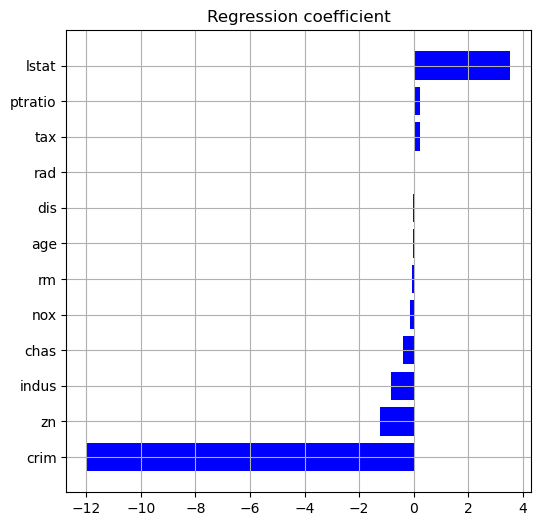

In [81]:
# 回帰係数の可視化
fig, ax = plt.subplots(figsize=(6,6))

imp_coef = coef.sort_values()

ax.barh(X.columns,
        imp_coef,
        color ='blue')

ax.grid()
plt.title('Regression coefficient') 

plt.show() 

### ③　モデルの評価：精度の計算
モデルの汎化性能を評価するために、決定係数（R²スコア）を用いて訓練データとテストデータのスコアを比較します。

**過学習**: モデルが訓練データに過度に適合し、新しいデータに対しては性能が低下する現象です。訓練データのR²スコアが高く、テストデータのR²スコアが低い場合、過学習が疑われます。  
**汎化性能**: モデルが未知のデータに対しても高い予測精度を示す能力です。訓練データとテストデータのR²スコアが近い場合、モデルは汎化性能が高いと考えられます。  
す。
### 訓練データ

In [84]:
#予測値
y_pred_train = model.predict(X_train)

In [86]:
# 訓練データの精度
r2_score = model.score(X_train, y_train)
print('訓練データ決定係数:{:.3f}'.format(r2_score))

訓練データ決定係数:0.770


### テストデータ

In [89]:
#テストデータの予測値
y_pred_test = model.predict(X_test)

In [91]:
# テストデータの精度
r2_score = model.score(X_test, y_test)
print('テストデータ決定係数:{:.3f}'.format(r2_score))

テストデータ決定係数:0.758


### ④　観測値-予測値プロット
機械学習モデルの予測結果と実際の観測値を散布図で可視化したグラフです。このプロットは、モデルの予測精度を評価し、予測誤差の傾向を把握する上で非常に有効です。

**理想的なプロット**: 予測値と観測値がほぼ一致する場合、データ点が対角線上に近接して分布します。これは、モデルがデータの傾向を正しく捉えていることを示します。  
**誤差の傾向**: データ点が対角線から大きく外れている場合、モデルの予測に誤差が含まれていることを示します。また、誤差が特定の範囲で偏っている場合、モデルに改善の余地があることを示唆します。  

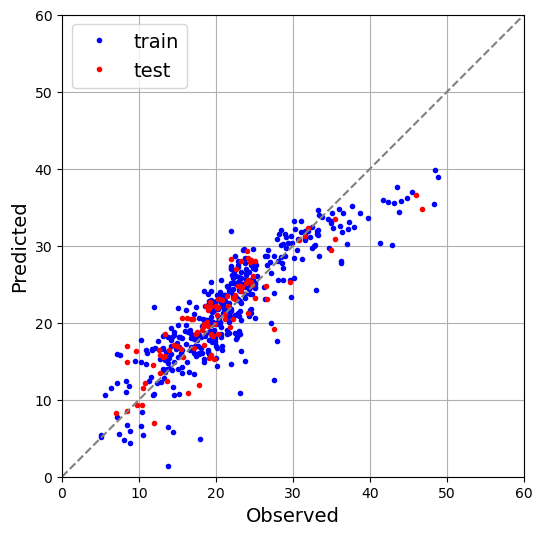

In [94]:
fig, ax = plt.subplots(figsize=(6,6))

#データのプロット
ax.plot(y_train, y_pred_train, '.', c = 'blue', label ='train')
ax.plot(y_test, y_pred_test, '.', c = 'red', label ='test')

# 対角線のプロット
ax.plot([0, 100], [0, 100], 
        linestyle='--', 
        color ='gray')  

#グラフの修飾
ax.axis('square')
ax.set_xlabel('Observed',fontsize = 14)
ax.set_ylabel('Predicted',fontsize = 14)

ax.set_xlim(0,60)
ax.set_ylim(0,60)
ax.legend(fontsize = 14)
ax.grid()

plt.show()

## 2.Lasso回帰

Lasso回帰は、線形回帰モデルにL1正則化項を追加することで、特徴選択と過学習防止という二つの効果を実現する手法です。

**【1】特徴選択**  
L1正則化項は、モデルの複雑さを抑える働きがあり、多くの場合、一部の回帰係数を厳密に0にします。これにより、目的変数にほとんど影響を与えない無関係な特徴量を自動的にモデルから除外することができます。この特徴選択機能は、高次元のデータにおいて、モデルの解釈性を高め、過学習を防ぐ上で非常に有効です。

**【2】過学習防止**  
L1正則化は、モデルの複雑さを制限することで、過学習を抑制します。過学習とは、モデルが訓練データに過度に適合しすぎてしまい、新しいデータに対しては予測精度が低下する現象です。Lasso回帰は、この過学習問題に対処し、モデルの汎化性能を向上させることができます。  


Lasso回帰は、特徴量が多く、モデルの解釈性や汎化性能を重視する場面で特に有効な手法です。特徴選択と過学習防止という二つの効果を同時に実現できるため、様々な分野で活用されています。

### ①　モデル構築
Lasso は、Scikit-learnライブラリから提供されるLasso回帰のクラスよりインスタンスを作成することができます。特徴量（説明変数）と目的変数の設定についても線形重回帰と同じ手続きで進められます。

In [98]:
# Lasso回帰モデル
from sklearn.linear_model import Lasso

#予測器の作成
model = Lasso()
model.fit(X_train, y_train)

Lasso()

### ②　特徴量の評価（重要度）
Lassoにより二つの説明変数が0になり、次元削減がなされています。

In [ ]:
#係数（重み）と切片
print('係数：',model.coef_)
print('切片：',model.intercept_)

In [ ]:
coef = pd.Series(model.coef_, index = X.columns)
coef

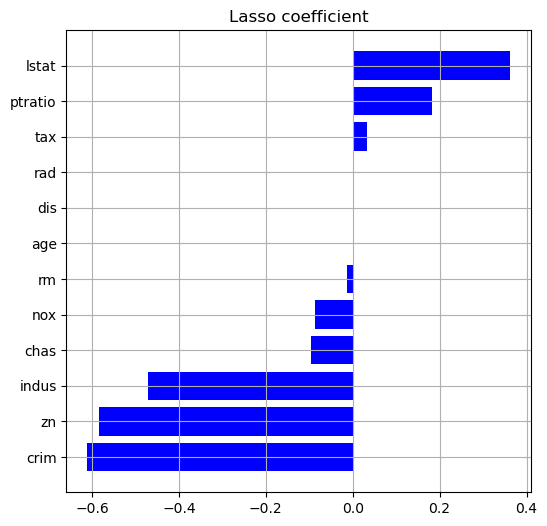

In [36]:
# 回帰係数の可視化
fig, ax = plt.subplots(figsize=(6,6))

imp_coef = coef.sort_values()

ax.barh(X.columns,
        imp_coef,
        color ='blue')

ax.grid()
plt.title('Lasso coefficient') 

plt.show() 

### ③　モデルの評価：精度の計算
### 訓練データ

In [37]:
#予測値
y_pred_train = model.predict(X_train)

In [38]:
# 訓練データの精度
r2_score = model.score(X_train, y_train)
print('訓練データ決定係数:{:.3f}'.format(r2_score))

訓練データ決定係数:0.703


### テストデータ

In [39]:
#テストデータの予測値
y_pred_test = model.predict(X_test)

In [40]:
# 訓練データの精度
r2_score = model.score(X_test, y_test)
print('テストデータ決定係数:{:.3f}'.format(r2_score))

テストデータ決定係数:0.681


### ④　観測値-予測値プロット

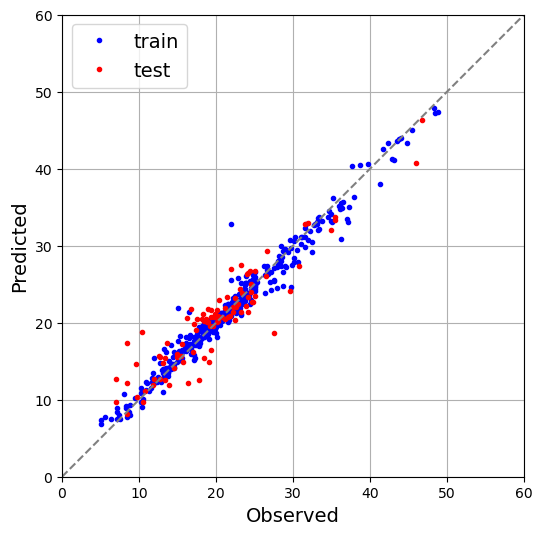

In [50]:
fig, ax = plt.subplots(figsize=(6,6))

#データのプロット
ax.plot(y_train, y_pred_train, '.', c = 'blue', label ='train')
ax.plot(y_test, y_pred_test, '.', c = 'red', label ='test')

# 対角線のプロット
ax.plot([0, 100], [0, 100], 
        linestyle='--', 
        color ='gray')  

#グラフの修飾
ax.axis('square')
ax.set_xlabel('Observed',fontsize = 14)
ax.set_ylabel('Predicted',fontsize = 14)

ax.set_xlim(0,60)
ax.set_ylim(0,60)
ax.legend(fontsize = 14)
ax.grid()

plt.show()

## 3. ランダムフォレスト

ランダムフォレストは、複数の決定木をランダムに組み合わせることで、高い予測精度と安定性を両立させたアンサンブル学習モデルです。主な特徴は以下の通りです。

**【1】アンサンブル学習による高精度化と過学習防止**  
複数の決定木を組み合わせることで、単一の決定木よりもより複雑なパターンを学習し、予測精度を高めることができます。また、各決定木は異なる特徴量を重視するため、特定の特徴量に過度に依存してしまうことを防ぎ、過学習のリスクを低減します。

**【2】特徴量の重要度評価**  
ランダムフォレストは、各特徴量が予測にどれだけ貢献しているかを定量的に評価する機能を持っています。この機能を活用することで、重要な特徴量を特定し、モデルの解釈性を高めることができます。  

ランダムフォレストは、高い予測精度と解釈性の両方を兼ね備えた強力な機械学習モデルです。様々な分野で活用されており、特に特徴量が多く、複雑なデータに対して有効です。

### ①　モデル構築
`RandomForestRegressor()` は、Scikit-learnにおけるランダムフォレスト回帰のクラスです。RandomForestRegressor(n_estimators=10) で、10本の決定木を使用するランダムフォレスト回帰モデルを作成しています。なお、`n_estimators` は、ランダムフォレストに含まれる決定木の数を指定するパラメータです。

In [42]:
#ランダムフォレスト回帰
from sklearn.ensemble import RandomForestRegressor

#予測器の作成
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

### ②　特徴量の評価（重要度）

In [43]:
coef = pd.Series(model.feature_importances_, index = X.columns)
coef

crim       0.051519
zn         0.001399
indus      0.007598
chas       0.001525
nox        0.017772
rm         0.490182
age        0.024242
dis        0.028671
rad        0.003519
tax        0.013442
ptratio    0.027182
lstat      0.332948
dtype: float64

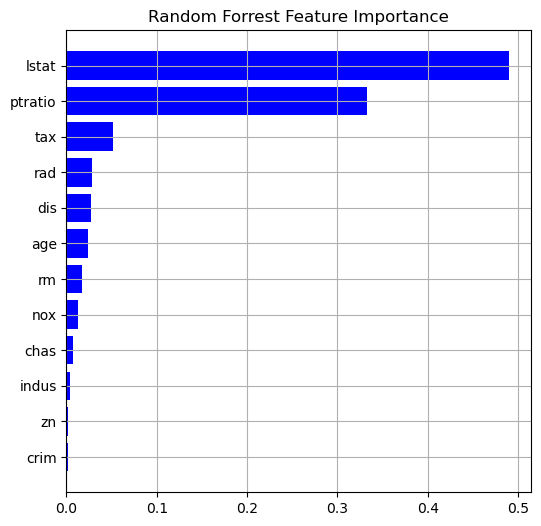

In [44]:
# 回帰係数の可視化
fig, ax = plt.subplots(figsize=(6,6))

imp_coef = coef.sort_values()

ax.barh(X.columns,
        imp_coef,
        color ='blue')

ax.grid()
plt.title('Random Forrest Feature Importance') 
plt.show()

### ③　モデルの評価：精度の計算
### 訓練データ

In [45]:
#予測値
y_pred_train = model.predict(X_train)

In [46]:
# 訓練データの精度
r2_score = model.score(X_train, y_train)
print('訓練データ決定係数:{:.3f}'.format(r2_score))

訓練データ決定係数:0.970


### テストデータ

In [47]:
#テストデータの予測値
y_pred_test = model.predict(X_test)

In [48]:
# 訓練データの精度
r2_score = model.score(X_test, y_test)
print('テストデータ決定係数:{:.3f}'.format(r2_score))

テストデータ決定係数:0.851


### ④　観測値-予測値プロット

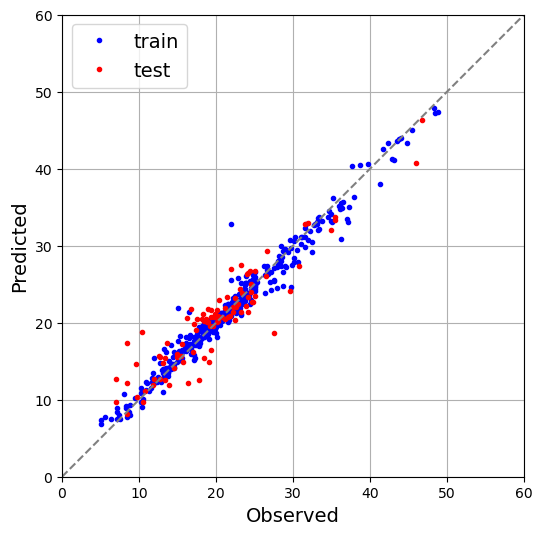

In [51]:
fig, ax = plt.subplots(figsize=(6,6))

#データのプロット
ax.plot(y_train, y_pred_train, '.', c = 'blue', label ='train')
ax.plot(y_test, y_pred_test, '.', c = 'red', label ='test')

# 対角線のプロット
ax.plot([0, 100], [0, 100], 
        linestyle='--', 
        color ='gray')  

#グラフの修飾
ax.axis('square')
ax.set_xlabel('Observed',fontsize = 14)
ax.set_ylabel('Predicted',fontsize = 14)

ax.set_xlim(0,60)
ax.set_ylim(0,60)
ax.legend(fontsize = 14)
ax.grid()

plt.show()

## Closing：おわりに


さらに機械学習モデルの精度をあげるために、**k-foldクロスバリデーション**や**ハイパーパラメータ調整**を行います。

**k-foldクロスバリデーション（k-fold cross-validation）**  

機械学習モデルの性能を評価するための手法です。通常、データセットをトレーニングセットとテストセットに分割してモデルを評価しますが、クロスバリデーションでは、データセットを複数の部分集合に分割し、それぞれをトレーニングセットとテストセットとして使用します。

具体的な手順は以下の通りです。

1. データセットをk個の部分集合（フォールド）に分割します。通常、kは5または10がよく使用されます。

1. k個の部分集合のうちの1つをテストセットとし、残りのk-1個の部分集合をトレーニングセットとします。

1. モデルをトレーニングセットで学習させ、テストセットで評価します。

1. ステップ2-3をk回繰り返し、k個のモデルを作成し、評価します。

1. k回の評価結果を平均化し、モデルの性能を推定します。

クロスバリデーションは、モデルの性能を正確に評価するために使用されます。各フォールドがテストセットとして使用されるため、全てのデータがモデルの評価に使用されるため、モデルの性能評価がより信頼性の高い結果を提供します。また、データの分割方法による結果のバイアスを軽減する効果もあります。

クロスバリデーションは、ハイパーパラメータのチューニングや異なるモデルの比較など、機械学習のさまざまなタスクで広く使用されます。

**ハイパーパラメータ（hyperparameter）**  

機械学習モデルのハイパーパラメータは、モデルの振る舞いやパフォーマンスに影響を与える設定値です。ハイパーパラメータの適切な調整は、モデルの性能を最適化するために非常に重要です。ハイパーパラメータ調整の一般的な手法には、グリッドサーチ、ランダムサーチ、ベイズ最適化などがあります。

* **グリッドサーチ（Grid Search）**：
グリッドサーチでは、事前に指定されたハイパーパラメータ値の組み合わせの中から最適な組み合わせを探索します。具体的には、調整したいハイパーパラメータの範囲を指定し、それらのパラメータの組み合わせをすべて試して最適な組み合わせを見つける手法です。ただし、組み合わせの数が非常に多い場合は計算コストが高くなる可能性があります。

* **ランダムサーチ（Random Search）**：
ランダムサーチでは、ハイパーパラメータの範囲内からランダムに組み合わせを選択し、それらの組み合わせでモデルを評価します。グリッドサーチと比較して効率的な探索が可能であり、特定の範囲内でのハイパーパラメータの重要度を把握するのに役立ちます。

* **ベイズ最適化（Bayesian Optimization）**：
ベイズ最適化は、事前の知識を利用して最適なハイパーパラメータを探索する手法です。モデルの評価結果を利用して、パラメータ空間内で最適な探索を行います。ベイズ最適化は、少ない評価回数で最適なハイパーパラメータを見つけることができる場合があります。

これらの手法は、ハイパーパラメータの探索空間と目的関数の特性に合わせて選択する必要があります。また、クロスバリデーションなどを使用して、ハイパーパラメータの選択によるモデルの性能を適切に評価することも重要です。